In [1]:
import numpy as np
import torch as torch
import torchgmm as gmm
import dgp
from scipy.stats import distributions as iid
from numpy.linalg import inv
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

    
t_type = torch.float64
gmm_steps = 2
dgp_obj = dgp.dgp(1, 10000, t_type, device)
dgp_obj_large_n = dgp.dgp(1, 100000, t_type, device)

# Part (3)

### Part (a)

In [3]:
# Part (a)
beta_true = np.array([5, 10]).reshape(-1,1)
data      = dgp_obj.part_a(beta_true[0,0], beta_true[1,0])
moment_f  = dgp.moment_functions("a") 
n_m       = 3
b_est, weights = gmm.solve_kstep_GMM(gmm_steps, beta_true*.1, data, n_m, device, t_type, 
                                     f_m=moment_f)

print("Estimated values: ", b_est.detach().numpy().flatten())
print("True values: ", beta_true.flatten())
print("Optimal weights using estimated beta: \n",weights)
print("Optimal weights using true beta: \n",torch.inverse(gmm.Omegahat(beta_true, data, f_m=moment_f)))

GMM-1 loss: 1.716125
GMM-2 loss: 1.003800
Estimated values:  [5.03054354 9.96644537]
True values:  [ 5 10]
Optimal weights using estimated beta: 
 tensor([[ 2.4968e-01,  1.7769e-03, -4.9508e-03],
        [ 1.7769e-03,  4.9864e-03, -7.1912e-05],
        [-4.9508e-03, -7.1912e-05,  1.6405e-04]], dtype=torch.float64)
Optimal weights using true beta: 
 tensor([[ 2.4946e-01,  1.9253e-03, -4.9459e-03],
        [ 1.9253e-03,  5.0009e-03, -8.6944e-05],
        [-4.9459e-03, -8.6944e-05,  1.6405e-04]], dtype=torch.float64)


### Part (b)

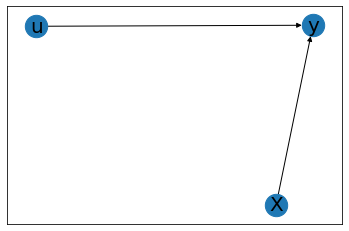

In [4]:
## Part b
# Note that we are leaving out the constant
graph = nx.DiGraph()
graph.add_edges_from([("X","y"),("u","y")])
nx.draw_networkx(graph, arrows=True, node_size=500, font_size=20)
plt.show()

In [5]:
# Part (b)
beta_true = np.array([2, 4]).reshape(-1,1)
data      = dgp_obj.part_b_c(beta_true)
moment_f  = dgp.moment_functions("b") 
n_m       = 2

b_est, weights = gmm.solve_kstep_GMM(gmm_steps, beta_true*.1, data, n_m, device, t_type,
                                    f_m=moment_f)

print("Estimated values: ", b_est.detach().numpy().flatten())
print("True values: ", beta_true.flatten())
print("Optimal weights using estimated beta: \n",weights)
print("Optimal weights using true beta: \n",torch.inverse(gmm.Omegahat(beta_true, data)))

GMM-1 loss: 0.000000
GMM-2 loss: 0.000000
Estimated values:  [2.00968445 3.98955834]
True values:  [2 4]
Optimal weights using estimated beta: 
 tensor([[1.0025, 0.0025],
        [0.0025, 1.0158]], dtype=torch.float64)
Optimal weights using true beta: 
 tensor([[1.0024, 0.0023],
        [0.0023, 1.0152]], dtype=torch.float64)


### Part (c)

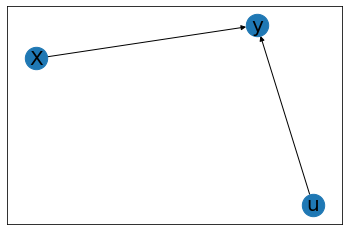

In [6]:
## Part c
# Note that we are leaving out the constant
graph = nx.DiGraph()
graph.add_edges_from([("X","y"),("u","y")])
nx.draw_networkx(graph, arrows=True, node_size=500, font_size=20)
plt.show()

In [7]:
# Part (c)
beta_true = np.array([2, 4, 3]).reshape(-1,1)
data      = dgp_obj.part_b_c(beta_true[:2], s2=beta_true[2]) # introducing some variance
moment_f  = dgp.moment_functions("c") 
n_m       = 3

b_est, weights = gmm.solve_kstep_GMM(gmm_steps, beta_true*.1, data, n_m, device, t_type,
                                    f_m=moment_f)

print("Estimated values: ", b_est.detach().numpy().flatten())
print("True values: ", beta_true.flatten())
print("Optimal weights using estimated beta: \n",weights)
print("Optimal weights using true beta: \n",torch.inverse(gmm.Omegahat(beta_true, data,
                                                                      f_m=moment_f)))

GMM-1 loss: 0.000000
GMM-2 loss: 0.000000
Estimated values:  [2.01677395 3.98191452 2.99239723]
True values:  [2 4 3]
Optimal weights using estimated beta: 
 tensor([[ 0.3343,  0.0007, -0.0024],
        [ 0.0007,  0.3388,  0.0033],
        [-0.0024,  0.0033,  0.0551]], dtype=torch.float64)
Optimal weights using true beta: 
 tensor([[ 0.3345,  0.0004, -0.0042],
        [ 0.0004,  0.3389,  0.0052],
        [-0.0042,  0.0052,  0.0551]], dtype=torch.float64)


### Part (d)

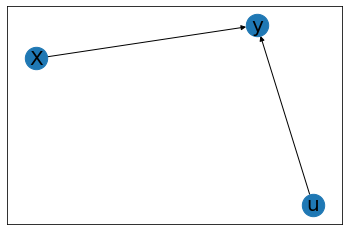

In [8]:
## Part d
# Note that we are leaving out the constant
graph = nx.DiGraph()
graph.add_edges_from([("X","y"),("u","y")])
nx.draw_networkx(graph, arrows=True, node_size=500, font_size=20)
plt.show()

In [9]:
beta_true = np.array([2, 4, 3]).reshape(-1,1)
data      = dgp_obj.part_d(beta_true[:2], s2=beta_true[2]) # introducing some variance
moment_f  = dgp.moment_functions("d") 
n_m       = 3

b_est, weights = gmm.solve_kstep_GMM(gmm_steps, beta_true*.1, data, n_m, device, t_type,
                                    f_m=moment_f)

print("Estimated values: ", b_est.detach().numpy().flatten())
print("True values: ", beta_true.flatten())
print("Optimal weights using estimated beta: \n",weights)
print("Optimal weights using true beta: \n",torch.inverse(gmm.Omegahat(beta_true, data,
                                                            f_m=moment_f)))

GMM-1 loss: 0.000000
GMM-2 loss: 0.000000
Estimated values:  [1.88739056 3.65558888 3.0093874 ]
True values:  [2 4 3]
Optimal weights using estimated beta: 
 tensor([[ 2.0453e-01, -7.5101e-02, -1.4244e-04],
        [-7.5101e-02,  2.9742e-02,  7.4557e-05],
        [-1.4244e-04,  7.4557e-05,  1.4982e-06]], dtype=torch.float64)
Optimal weights using true beta: 
 tensor([[ 2.1008e-01, -7.7358e-02, -1.5098e-04],
        [-7.7358e-02,  3.0698e-02,  7.9756e-05],
        [-1.5098e-04,  7.9756e-05,  1.5456e-06]], dtype=torch.float64)


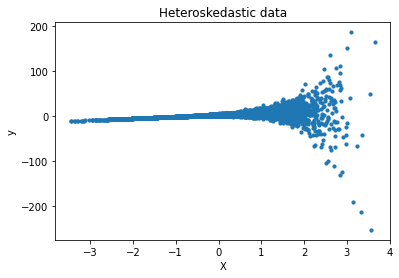

In [10]:
plt.scatter(data[1][:,1],data[0], s=10)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Heteroskedastic data")
plt.show()

### Part (e)

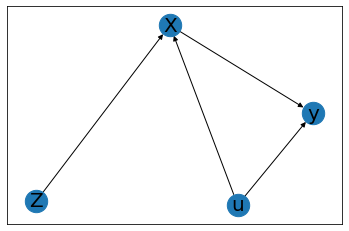

In [11]:
# Note that we are leaving out the constant
graph = nx.DiGraph()
graph.add_edges_from([("X","y"),("u","y"),("u","X"), ("Z","X")])
nx.draw_networkx(graph, arrows=True, node_size=500, font_size=20)
plt.show()

In [12]:
beta_true = np.array([2, 4]).reshape(-1,1)
data, covXZu = dgp_obj.part_e(beta_true) # introducing some variance
moment_f  = dgp.moment_functions("e") 
n_m       = 3

b_est, weights = gmm.solve_kstep_GMM(gmm_steps, beta_true*.1, data, n_m, device, t_type,
                                    f_m=moment_f)

print("Estimated values: ", b_est.detach().numpy().flatten())
print("True values: ", beta_true.flatten())
print("Optimal weights using estimated beta: \n",weights)
print("Optimal weights using true beta: \n",torch.inverse(gmm.Omegahat(beta_true, data,
                                                                      f_m=moment_f)))

GMM-1 loss: 0.370295
GMM-2 loss: 0.341103
Estimated values:  [1.98582746 4.05223864]
True values:  [2 4]
Optimal weights using estimated beta: 
 tensor([[ 0.2092, -0.0489, -0.1469],
        [-0.0489,  0.4047,  0.0485],
        [-0.1469,  0.0485,  0.6030]], dtype=torch.float64)
Optimal weights using true beta: 
 tensor([[ 0.2037, -0.0479, -0.1433],
        [-0.0479,  0.3938,  0.0471],
        [-0.1433,  0.0471,  0.5879]], dtype=torch.float64)


### Part (f)

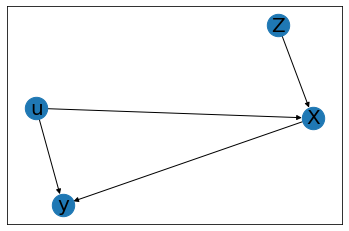

In [13]:
# Note that we are leaving out the constant
graph = nx.DiGraph()
graph.add_edges_from([("X","y"),("u","y"),("u","X"), ("Z","X")])
nx.draw_networkx(graph, arrows=True, node_size=500, font_size=20)
plt.show()

In [14]:
beta_true = np.array([2, 4]).reshape(-1,1)
data, covXZu = dgp_obj.part_f(beta_true, f=lambda x: 2*torch.exp(x)) 
moment_f  = dgp.moment_functions("f") 
n_m       = 3

b_est, weights = gmm.solve_kstep_GMM(gmm_steps, beta_true*.1, data, n_m, device, t_type,
                                    f_m=moment_f)

print("Estimated values: ", b_est.detach().numpy().flatten())
print("True values: ", beta_true.flatten())
print("Optimal weights using estimated beta: \n",weights)
print("Optimal weights using true beta: \n",torch.inverse(gmm.Omegahat(beta_true, data,
                                                                      f_m=moment_f)))

GMM-1 loss: 0.365664
GMM-2 loss: 0.339619
Estimated values:  [1.99999982 4.00000005]
True values:  [2 4]
Optimal weights using estimated beta: 
 tensor([[ 0.1157, -0.1033, -0.1260],
        [-0.1033,  0.3532,  0.0569],
        [-0.1260,  0.0569,  0.5774]], dtype=torch.float64)
Optimal weights using true beta: 
 tensor([[ 0.2037, -0.0479, -0.1433],
        [-0.0479,  0.3938,  0.0471],
        [-0.1433,  0.0471,  0.5879]], dtype=torch.float64)


### Part (g)

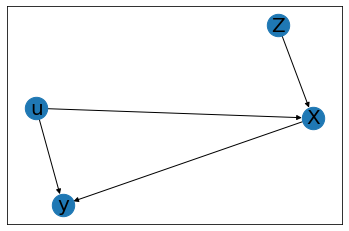

In [15]:
# Note that we are leaving out the constant
graph = nx.DiGraph()
graph.add_edges_from([("X","y"),("u","y"),("u","X"), ("Z","X")])
nx.draw_networkx(graph, arrows=True, node_size=500, font_size=20)
plt.show()

In [16]:
beta_true = np.array([2, 4]).reshape(-1,1)
data, covXZu = dgp_obj.part_g(beta_true, f=lambda x, b: x**2 @ b**2) 
moment_f  = dgp.moment_functions("g") 
n_m       = 3

b_est, weights = gmm.solve_kstep_GMM(gmm_steps, beta_true*.1, data, n_m, device, t_type,
                                    f_m=moment_f)

print("Estimated values: ", b_est.detach().numpy().flatten())
print("True values: ", beta_true.flatten())
print("Optimal weights using estimated beta: \n",weights)
print("Optimal weights using true beta: \n",torch.inverse(gmm.Omegahat(beta_true, data,
                                                                      f_m=moment_f)))

GMM-1 loss: 0.466917
GMM-2 loss: 0.466917
Estimated values:  [1.97782189 4.00745575]
True values:  [2 4]
Optimal weights using estimated beta: 
 tensor([[ 0.2075, -0.0491, -0.1387],
        [-0.0491,  0.4026,  0.0513],
        [-0.1387,  0.0513,  0.5899]], dtype=torch.float64)
Optimal weights using true beta: 
 tensor([[ 0.2037, -0.0479, -0.1433],
        [-0.0479,  0.3938,  0.0471],
        [-0.1433,  0.0471,  0.5879]], dtype=torch.float64)


### Part (h)

In [17]:
??

# Part (4)

In [18]:
gmm_steps = 2

n_draws = 1000
n_trials = 1000
b_est_list = np.zeros((n_trials, 3))

for i in range(n_trials):
    dgp_obj = dgp.dgp(1+i, n_draws, t_type, device)

    beta_true = np.array([2, 4, 3]).reshape(-1,1)
    data      = dgp_obj.part_d(beta_true[:2], s2=beta_true[2]) # introducing some variance
    moment_f  = dgp.moment_functions("d") 
    n_m       = 3

    b_est, weights = gmm.solve_kstep_GMM(gmm_steps, beta_true*.1, data, n_m, device, t_type,
                                        f_m=moment_f, final_verbose=False)
    
    b_est_list[i,:] = b_est.flatten()


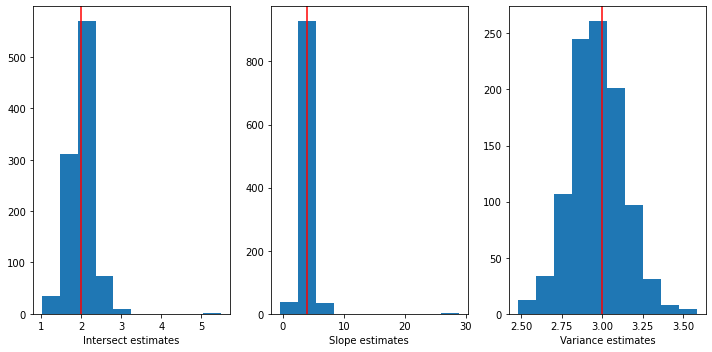

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].hist(b_est_list[:,0])
ax[0].axvline(x=beta_true[0], color='r')
ax[1].hist(b_est_list[:,1])
ax[1].axvline(x=beta_true[1], color='r')
ax[2].hist(b_est_list[:,2])
ax[2].axvline(x=beta_true[2], color='r')
ax[0].set_xlabel("Intersect estimates")
ax[1].set_xlabel("Slope estimates")
ax[2].set_xlabel("Variance estimates")
fig.tight_layout()
plt.show()